# Combining Threshold with canny

This notebook tries to combine and summarize the methods we used to detect edges. First we apply a threshold to transform the image to binary and try to reduce noise. Afterwards we find edges on the simplified image.

In [90]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import canny
from scipy import ndimage as ndi
from skimage import measure

In [112]:
img_liver_path = '../images/liver/liver_cirrhosis_1.png'
img_liver_healthy_path = '../images/liver/liver_healthy.png'
img_liver = cv2.imread(img_liver_path, 0)
img_liver_healthy = cv2.imread(img_liver_healthy_path, 0)

we should test on other images that this threshold also works this well.

steps we do here:

- threshold the image (using THRESH_BINARY)
- filling the holes 
- use canny to find edges

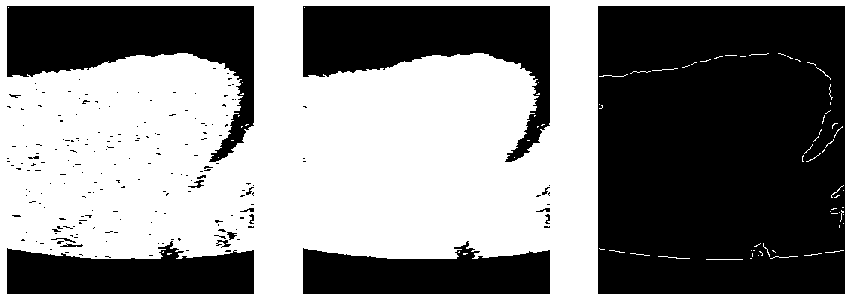

In [121]:
ret, thr = cv2.threshold(img_liver, 35, 255, cv2.THRESH_BINARY)
fill_bin = ndi.binary_fill_holes(thr)
edges_img = canny(fill_bin, sigma=3)

graphics = [thr, fill_bin, edges_img]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,8))
for gr, ax in zip(graphics, axs):
    ax.imshow(gr, 'gray')
    ax.set_axis_off()

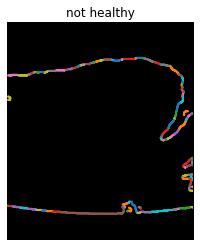

In [135]:
base_img = edges_img
contours = measure.find_contours(base_img, 0.9)

fig, ax = plt.subplots()
ax.imshow(base_img, 'gray')
ax.axis('off')
ax.set_title('not healthy')
for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

for simplicity and to compare the images lets write a simple function that finds the edges.

In [123]:
def to_edges(img):
    ret, thr = cv2.threshold(img, 35, 255, cv2.THRESH_BINARY)
    fill_bin = ndi.binary_fill_holes(thr)
    return canny(fill_bin, sigma=3)

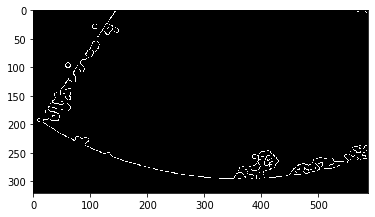

In [124]:
healthy_edges = to_edges(img_liver_healthy)
plt.imshow(healthy_edges, 'gray')

note that only the edges of the scan and some noise is found in this image. Which would be nice if this works on different test images, as we could look for ways to detect the edges of the scan.

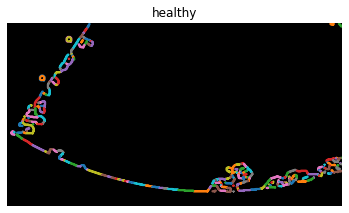

In [136]:
healthy_contours = measure.find_contours(healthy_edges, 0.8)

fig, ax = plt.subplots()
ax.imshow(healthy_edges, 'gray')
ax.axis('off')
ax.set_title('healthy')
for n, contour in enumerate(healthy_contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)